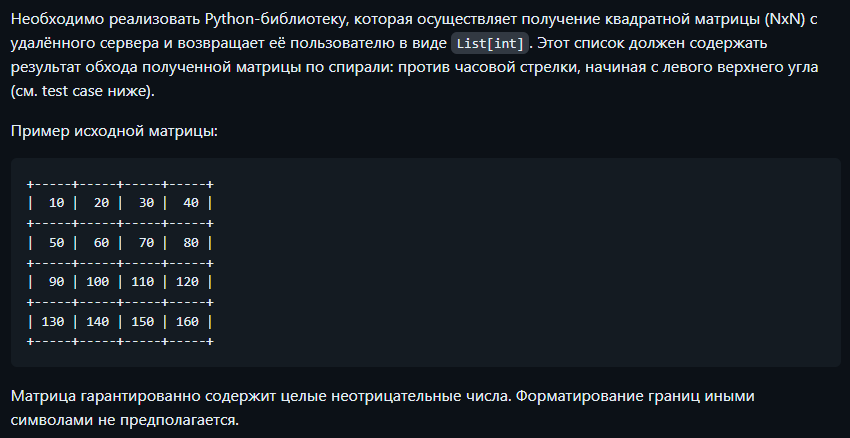

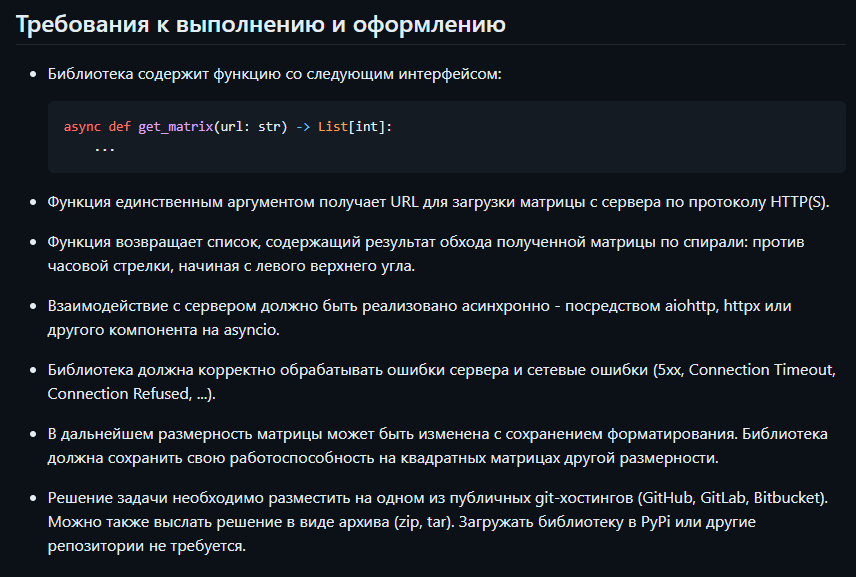

In [1]:
import aiohttp
import asyncio

async def get_text(url):
    async with aiohttp.ClientSession() as session:
        async with session.get(url) as resp:
            return await resp.text()

url = "https://raw.githubusercontent.com/avito-tech/python-trainee-assignment/main/matrix.txt"
text = await get_text(url)
text

'+-----+-----+-----+-----+\n|  10 |  20 |  30 |  40 |\n+-----+-----+-----+-----+\n|  50 |  60 |  70 |  80 |\n+-----+-----+-----+-----+\n|  90 | 100 | 110 | 120 |\n+-----+-----+-----+-----+\n| 130 | 140 | 150 | 160 |\n+-----+-----+-----+-----+\n'

In [10]:
import re
import numpy as np

def text_to_matrix(text):
    nums = re.findall(r"\d+", text)
    nums_list = [int(num) for num in nums]
    size = int(len(nums_list)**0.5)
    
    return np.array(nums_list).reshape(size, size)

matrix = text_to_matrix(text)
matrix

array([[ 10,  20,  30,  40],
       [ 50,  60,  70,  80],
       [ 90, 100, 110, 120],
       [130, 140, 150, 160]])

In [11]:
def rotate_and_collect(matrix):
    result = []
    while matrix.size > 0:
        matrix = np.rot90(matrix, -1)
        result.extend(matrix[0][::-1])
        matrix = np.delete(matrix, 0, axis=0)
    
    return result

[10, 50, 90, 130, 140, 150, 160, 120, 80, 40, 30, 20, 60, 100, 110, 70]

In [ ]:
async def get_matrix(url):
    text = await get_text(url)
    matrix = text_to_matrix(text)
    return rotate_and_collect(matrix)